# Demo 2A

In [2]:
from azureml.core import Workspace, Experiment, Run
ws = Workspace.get(name='BAUERML',
subscription_id='52b56929-ee84-495c-91c3-a84dfacbc9d2',
resource_group='DP'
)

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FANAKH3ST to authenticate.
Interactive authentication successfully completed.


In [4]:
ws.get_details()

{'id': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourceGroups/DP/providers/Microsoft.MachineLearningServices/workspaces/BAUERML',
 'name': 'BAUERML',
 'location': 'eastus',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'tags': {},
 'sku': 'Enterprise',
 'workspaceid': 'd399337a-7a49-478d-a1be-d69a1fbe3add',
 'description': '',
 'friendlyName': '',
 'creationTime': '2020-01-16T03:50:28.5061626+00:00',
 'keyVault': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp/providers/microsoft.keyvault/vaults/bauerml9283082904',
 'applicationInsights': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp/providers/microsoft.insights/components/bauerml9162298548',
 'identityPrincipalId': '73868625-8fe1-450a-a664-2d45177710f1',
 'identityTenantId': '60623c36-25e7-4dec-a900-05b500441e54',
 'identityType': 'SystemAssigned',
 'storageAccount': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp/providers/microsoft.storag

Create the configuration file

In [5]:
ws.write_config()

Log something to the workspace

In [6]:
from azureml.core import Experiment
# create an experiment
exp = Experiment(workspace=ws, name='dummy_experiment')
# start a run
run = exp.start_logging()
# log a number
run.log('trial', 30)
# log a list (Fibonacci numbers)
run.log_list('minha lista', [1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
# finish the run
run.complete()
print('Execution complete')

Execution complete


View logged results

In [7]:
print(run.get_portal_url())

https://ml.azure.com/experiments/dummy_experiment/runs/7e86ed2b-484e-4ff4-8cc9-5c9f7f9e7338?wsid=/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/DP/workspaces/BAUERML


# Demo 2B

Train a local model with the Azure Machine Learning service

In [8]:
# import packages
import os
import urllib.request
#create a fold for the dataset
os.makedirs('./data', exist_ok = True)
# load dataset to the directory, as you can see, you need to load train sets and test sets seperately
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', filename='./data/train-images.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', filename='./data/train-labels.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', filename='./data/test-images.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', filename='./data/test-labels.gz')
print('Code executed')

Code executed


Split the data into training and test sets

In [9]:
import gzip
import numpy as np
import struct
# load compressed MNIST gz files and return numpy arrays
def load_data(filename, label=False):
    with gzip.open(filename) as gz:
        struct.unpack('I', gz.read(4))
        n_items = struct.unpack('>I', gz.read(4))
        if not label:
            n_rows = struct.unpack('>I', gz.read(4))[0]
            n_cols = struct.unpack('>I', gz.read(4))[0]
            res = np.frombuffer(gz.read(n_items[0] * n_rows * n_cols),
dtype=np.uint8)
            res = res.reshape(n_items[0], n_rows * n_cols)
        else:
            res = np.frombuffer(gz.read(n_items[0]), dtype=np.uint8)
            res = res.reshape(n_items[0], 1)
        return res
# one-hot encode a 1-D array
def one_hot_encode(array, num_of_classes):
    return np.eye(num_of_classes)[array.reshape(-1)]
# load the data...
# To help the model to converge faster , you shrink the intensity values (X) from 0-255 to 0-1
X_train = load_data('./data/train-images.gz', False) / 255.0
y_train = load_data('./data/train-labels.gz', True).reshape(-1)
X_test = load_data('./data/test-images.gz', False) / 255.0
y_test = load_data('./data/test-labels.gz', True).reshape(-1)
print('Code executed')

Code executed


Let's display some images from the dataset

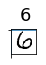

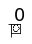

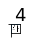

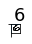

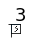

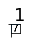

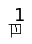

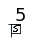

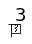

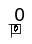

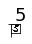

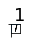

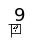

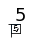

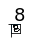

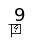

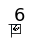

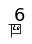

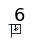

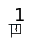

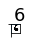

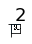

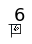

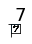

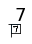

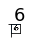

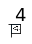

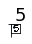

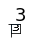

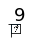

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# now let's show some randomly chosen images from the traininng set.
count = 0
sample_size = 30
plt.figure(figsize = (16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
    plt.show()

Training a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
#load model
clf = LogisticRegression()
#fit model
clf.fit(X_train, y_train)
#evaluate model using test set
y_hat = clf.predict(X_test)
#print the accuracy
print(np.average(y_hat == y_test))
print('Code executed')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Creating an Azure Machine Learning Experiment

In [ ]:
# Add this to top of code...
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import azureml
from azureml.core import Workspace, Run
# check core SDK version number
print("Azure ML SDK Version: ", azureml.core.VERSION)

If you have created an Azure Machine Learning service Workspace previously, run the code below to get a reference to it

In [15]:
ws = Workspace.get(name='BAUERML',
subscription_id='52b56929-ee84-495c-91c3-a84dfacbc9d2',
resource_group='DP'
)

If you do not have an Azure Machine Learning service Workspace already, you can create one with the code below

In [12]:
from azureml.core import Workspace
ws = Workspace.create(name='BAUERML',
subscription_id='52b56929-ee84-495c-91c3-a84dfacbc9d2',
resource_group='DP',
create_resource_group=True,
location='eastus'
)

WorkspaceException: WorkspaceException:
	Message: Workspace with name 'BAUERML' already exists under resource group with name 'DP'.
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "Workspace with name 'BAUERML' already exists under resource group with name 'DP'."
    }
}

In [16]:
ws.get_details()

{'id': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourceGroups/DP100/providers/Microsoft.MachineLearningServices/workspaces/MBAUER',
 'name': 'MBAUER',
 'location': 'eastus',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'tags': {},
 'workspaceid': 'bdc1daab-98cf-4d51-b3d7-f1b801de5d1e',
 'description': '',
 'friendlyName': '',
 'creationTime': '2019-10-31T21:35:16.9662835+00:00',
 'keyVault': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp100/providers/microsoft.keyvault/vaults/mbauer8790801097',
 'applicationInsights': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp100/providers/microsoft.insights/components/mbauer1670285242',
 'identityPrincipalId': 'dfde1a6c-a094-43bc-af1d-a5b4b62b91b2',
 'identityTenantId': '60623c36-25e7-4dec-a900-05b500441e54',
 'identityType': 'SystemAssigned',
 'storageAccount': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp100/providers/microsoft.storage/storageaccou

Create an experiment and a run within this workspace

In [17]:
#Create an experiment
from azureml.core import Experiment
experiment = Experiment(workspace = ws, name = "another-experiment")
#Create a run
run = experiment.start_logging()
run.log("trial",1)
run.complete()
print('Code executed')

Code executed


View logged results

In [42]:
print(run.get_portal_url())

https://mlworkspace.azure.ai/portal/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourceGroups/DP100/providers/Microsoft.MachineLearningServices/workspaces/MLWKSPACE-BAUER/experiments/another-experiment/runs/6bee0bb8-45f8-450a-9108-b1071b9e9c9a


# Demo 2C  - Hyperparameters

You learned that a compute target is the compute resource used to run a training script or host service
deployment. Here you create an Azure Machine Learning Compute (AmlCompute) as our compute
resource. The first step is to create a remote compute target

In [18]:
from azureml.core.compute import AmlCompute
from azureml.core.compute import ComputeTarget
import os
# Step 1: name the cluster, set minimal and maximal number of nodes
compute_name = os.environ.get("AML_COMPUTE_CLUSTER_NAME", "cpucluster")
min_nodes = os.environ.get("AML_COMPUTE_CLUSTER_MIN_NODES", 0)
max_nodes = os.environ.get("AML_COMPUTE_CLUSTER_MAX_NODES", 3)
# Step 2: choose environment variables
vm_size = os.environ.get("AML_COMPUTE_CLUSTER_SKU", "STANDARD_D2_V2")
provisioning_config = AmlCompute.provisioning_configuration(vm_size = vm_size,min_nodes =min_nodes,max_nodes = max_nodes)
# create the cluster
compute_target = ComputeTarget.create(ws, compute_name, provisioning_config)
print('Code executed')

Code executed


Load Data and Create the Modeling Script

In [19]:
#upload data using get_default_datastore()
ds = ws.get_default_datastore()
ds.upload(src_dir='./data', target_path='mnist', overwrite=True, show_progress=
True)
print('Code executed')

Uploading an estimated of 4 files
Uploading ./data/test-images.gz
Uploading ./data/test-labels.gz
Uploading ./data/train-images.gz
Uploading ./data/train-labels.gz
Uploaded ./data/train-labels.gz, 1 files out of an estimated total of 4
Uploaded ./data/test-labels.gz, 2 files out of an estimated total of 4
Uploaded ./data/test-images.gz, 3 files out of an estimated total of 4
Uploaded ./data/train-images.gz, 4 files out of an estimated total of 4
Uploaded 4 files
Code executed


Then you create a directory to save our training Python code

In [20]:
#import os if you haven't done so
import os
#create folder
folder_training_script= './trial_model_mnist'
os.makedirs(folder_training_script, exist_ok=True)

Finally, let's prepare our model training script. Note that in this script, you are defining three parameters.
The first parameter is for finding the data stored on the cloud, or for the path. The other two parameters
are used to define the parameter k in the kNN algorithm. ‘kmax’ limits the maximum value of k, and
'kinterval' decides the interval between each k

In [61]:
%%writefile $folder_training_script/train.py
# functions needed by downstream code...
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.
import gzip
import numpy as np
import struct
# load compressed MNIST gz files and return numpy arrays
def load_data(filename, label=False):
    with gzip.open(filename) as gz:
        struct.unpack('I', gz.read(4))
        n_items = struct.unpack('>I', gz.read(4))
    if not label:
        n_rows = struct.unpack('>I', gz.read(4))[0]
        n_cols = struct.unpack('>I', gz.read(4))[0]
        res = np.frombuffer(gz.read(n_items[0] * n_rows * n_cols),
        dtype=np.uint8)
        res = res.reshape(n_items[0], n_rows * n_cols)
    else:
        res = np.frombuffer(gz.read(n_items[0]), dtype=np.uint8)
        res = res.reshape(n_items[0], 1)
    return res
# one-hot encode a 1-D array
def one_hot_encode(array, num_of_classes):
    return np.eye(num_of_classes)[array.reshape(-1)]
#
# end of functions needed by downstream code...
import argparse
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from azureml.core import Run
# from utils import load_data
# let user feed in 2 parameters, the location of the data files (from datastore),and the regularization rate of the logistic regression model
parser = argparse.ArgumentParser()
parser.add_argument('--data-folder', type=str, dest='data_folder',
help='data folder mounting point')
parser.add_argument('--regularization', type=float, dest='reg', default=
0.01, help='regularization rate')
args = parser.parse_args()
data_folder = os.path.join(args.data_folder, 'mnist')
print('Data folder:', data_folder)
# load train and test set into numpy arrays
# note we scale the pixel intensity values to 0-1 (by dividing it with 255.0) so the model can converge faster.
X_train = load_data(os.path.join(data_folder, 'train-images.gz'), False) / 255.0
X_test = load_data(os.path.join(data_folder, 'test-images.gz'), False) / 255.0
y_train = load_data(os.path.join(data_folder, 'train-labels.gz'), True).reshape(-1)
y_test = load_data(os.path.join(data_folder, 'test-labels.gz'), True).reshape(-1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep = '\n')
# get hold of the current run
run = Run.get_context()
print('Train a logistic regression model with regularizaion rate of', args.reg)
clf = LogisticRegression(C=1.0/args.reg, random_state=42)
clf.fit(X_train, y_train)
print('Predict the test set')
y_hat = clf.predict(X_test)
# calculate accuracy on the prediction
acc = np.average(y_hat == y_test)
print('Accuracy is', acc)
run.log('regularization rate', np.float(args.reg))
run.log('accuracy', np.float(acc))
os.makedirs('outputs', exist_ok=True)
# note file saved in the outputs folder is automatically uploaded into experiment record
joblib.dump(value=clf, filename='outputs/sklearn_mnist_model.pkl')
print('Code executed')

Overwriting ./trial_model_mnist/train.py


Now, you must add a utils script as shown below for loading data and to create an estimator so that it's
easier to scale our work in the future. An estimator object is used to submit the run. Create your estimator
by running the following code to define these items:
●● The name of the estimator object, est.
●● The directory that contains your scripts. All the files in this directory are uploaded into the cluster
nodes for execution.
●● The compute target. In this case, you use the Azure Machine Learning compute cluster you created.
●● The training script name, train.py.
●● Parameters required from the training script.
●● Python packages needed for training.

In [62]:
from azureml.train.estimator import Estimator
script_params = {
'--data-folder': ds.as_mount(),
'--regularization': 0.8
}
#import scikit-learn package
est = Estimator(source_directory=folder_training_script,
script_params=script_params,
compute_target=compute_target,
entry_script='train.py',
conda_packages=['scikit-learn'])                

Submit Model, Monitor Run, and Retrieve Results

In [63]:
#run
run = experiment.submit(config=est)
run
print('Code executed')

Code executed


You could use widgets module from ‘azureml’ package to monitor our run. It can take up to ten minutes
for the experiment to process

In [64]:
# monitor the run
from azureml.widgets import RunDetails
RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

After this run finishes, you can print the results. The results were logged since you wrote the code in the
training script

In [52]:
#get result
print(run.get_metrics())

{}


If you are going to continue with this Learning Path, don't run the code below. If you are done and do
not plan to continue with the other modules, you can run the code below to delete the Azure Machine
Learning service resources you created

In [99]:
##### WARNING !!! #####
#Clean up resources
ws.delete(delete_dependent_resources=True)

WARNING - Retrying (Retry(total=3, connect=4, read=3, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='management.azure.com', port=443): Read timed out. (read timeout=100)",)': /subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourceGroups/DP100/providers/Microsoft.MachineLearningServices/workspaces/MLWKSPACE-BAUER?api-version=2018-11-19


# Demo 2D - Register and Deploy Models

### Where Do You Deploy Your Model?

The Azure Machine Learning Service provides several places you can deploy your trained model using the
Azure Machine Learning SDK, listed in the following table:
Azure Container Instances (ACI)6: This is a single container instance managed by Azure Container
Instances service. It has fast deployment speed (usually less than 5 minutes) and is an ideal environment
for development and testing purpose.
Azure Kubernetes Service (AKS)7: This is a set of containers managed by Azure Kubernetes Service. It
provides high-scale production deployments, auto-scale, and a front end to handle ingress and egress
requests. It usually takes around 20 minutes to set up, but this is a one-time setup and is ideal for
production purpose deployment.
Azure IoT Edge8: An Azure IoT Edge device is a Linux or Windows-based device that runs the Azure IoT
Edge runtime. Azure Machine Learning supports deploying machine learning models to IoT Edge devices
as IoT Edge modules. Once the model is deployed to IoT Edge devices, the model can be used in the
edge device directly without connect to the cloud, which reduces the data transfer amount and reduces
the response time.
Field-programmable gate array (FPGA)9: FPGAs contain an array of programmable logic blocks, and a
hierarchy of reconfigurable interconnects. Compared to CPU and GPUs, FPGAs provide a combination of
programmability and performance. The hardware can be programmed so that it can provide model
inference with hardware (which is usually much faster than software), and the hardware updates to a
different set of models, which provides flexibility. Azure Machine Learning supports deploying models to
use FPGAs on Azure

In [30]:
import azureml.core
from azureml.core import Workspace, Experiment, Run
print(azureml.core.VERSION)

1.0.57


In [31]:
ws = Workspace.get(name='MBAUER',
subscription_id='52b56929-ee84-495c-91c3-a84dfacbc9d2',
resource_group='DP100'
)

In [32]:
ws.get_details()

{'id': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourceGroups/DP100/providers/Microsoft.MachineLearningServices/workspaces/MBAUER',
 'name': 'MBAUER',
 'location': 'eastus',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'tags': {},
 'workspaceid': 'bdc1daab-98cf-4d51-b3d7-f1b801de5d1e',
 'description': '',
 'friendlyName': '',
 'creationTime': '2019-10-31T21:35:16.9662835+00:00',
 'containerRegistry': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourceGroups/DP100/providers/Microsoft.ContainerRegistry/registries/mbauera27aaecc',
 'keyVault': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp100/providers/microsoft.keyvault/vaults/mbauer8790801097',
 'applicationInsights': '/subscriptions/52b56929-ee84-495c-91c3-a84dfacbc9d2/resourcegroups/dp100/providers/microsoft.insights/components/mbauer1670285242',
 'identityPrincipalId': 'dfde1a6c-a094-43bc-af1d-a5b4b62b91b2',
 'identityTenantId': '60623c36-25e7-4dec-a900-05b500441e54',
 'iden

### Registering Your Model to the Azure Machine Learning Service

In [33]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
X, y = load_diabetes(return_X_y = True)
columns = ['age', 'gender', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5',
's6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)
data = {
"train":{"X": X_train, "y": y_train},
"test":{"X": X_test, "y": y_test}
}
print ("Data contains", len(data['train']['X']), "training samples and",len(data['test']['X']), "test samples")

Data contains 353 training samples and 89 test samples


Run the code below to train the model and display the Mean Squared Error

In [34]:
# Create, fit, and test the scikit-learn Ridge regression model
regression_model = Ridge(alpha=0.03)
regression_model.fit(data['train']['X'], data['train']['y'])
preds = regression_model.predict(data['test']['X'])
# Output the Mean Squared Error to the notebook and to the run
print('Mean Squared Error is', mean_squared_error(data['test']['y'],
preds))

Mean Squared Error is 3424.900315896017


Now run the code below to write the trained model to a text file in your local environment

In [35]:
from sklearn.externals import joblib
joblib.dump(value=regression_model, filename='sklearn_regression_model.pkl')

['sklearn_regression_model.pkl']

Now you can register your model in the workspace for further use. Like a container registry, the model
registry is a single place to keep track of all the models in your Azure Machine Learning Service, to make
sure that the models are stored in a structured format. With a single call to the Azure Machine Learning
Model Management service, you can manage your model

In [36]:
from azureml.core.model import Model
model = Model.register(model_path = "sklearn_regression_model.pkl",
model_name = "sklearn_regression_model.pkl",
tags = {'area': "diabetes", 'type': "regression"},
description = "Ridge regression model to predict diabetes",
workspace = ws)

Registering model sklearn_regression_model.pkl


### Create a Scoring Script

Container images allow users to deploy models reliably since the machine learning model always depends
on some other dependencies such as PyTorch12. Using containers to deploy machine learning
models can avoid dependency issues.
A container image has the following items packaged, which you need to prepare:
●● The model itself
●● The inference engine, such as PyTorch
●● The scoring file (score.py) or other application consuming the model
●● Any dependencies needed
The first step is to create the score.py file that consumes the model, like below. You only need to
define two functions: init, which loads the model and run, which does the inference:

In [37]:
%%writefile score.py
import pickle
import json
import numpy
from sklearn.externals import joblib
from sklearn.linear_model import Ridge
from azureml.core.model import Model
def init():
global model
model_path = Model.get_model_path('sklearn_regression_model.pkl')
# deserialize the model file back into a sklearn model
model = joblib.load(model_path)
# note you can pass in multiple rows for scoring
def run(raw_data):
try:
data = json.loads(raw_data)['data']
data = numpy.array(data)
result = model.predict(data)
# you can return any datatype if it is JSON-serializable
return result.tolist()
return 0
except Exception as e:
error = str(e)
return error

Overwriting score.py


### Create an Environment Configuration YAML File

The second step is to make sure the dependencies are included in the image. Azure Machine Learning
does that by creating a conda dependency file

In [65]:
from azureml.core.conda_dependencies import CondaDependencies
myenv = CondaDependencies.create(conda_packages=['numpy','scikit-learn'])
with open("myenv.yml","w") as f:
    f.write(myenv.serialize_to_string())

### Create a Container Image

The third step is preparing the container image by running the code below. This may take a few minutes.
You should see several output messages display as it creates the image.

In [66]:
from azureml.core.image import Image, ContainerImage
image_config = ContainerImage.image_configuration(runtime= "python",
                                execution_script="score.py",
                                conda_file="myenv.yml",
                                tags = {'area': "diabetes", 'type': "regression"},
                                description = "Image with ridge regression model")
image = Image.create(name = "myimage1",
# this is the model object
models = [model],
image_config = image_config,
workspace = ws)
image.wait_for_creation(show_output = True)
print('Execution complete')

Creating image
Running...............................
Succeeded
Image creation operation finished for image myimage1:2, operation "Succeeded"
Execution complete


After the code is executed, you can view the images in the Azure Machine Learning Service portal

### Deploy the Model as a Web Service

In this unit, you use Azure Container Instances to deploy the trained model as a web service. There are
two steps involved

Define the deployment configuration. For example, the following code defines a container that uses 1
CPU and 1 GB of memory

In [70]:
from azureml.core.webservice import AciWebservice
aciconfig = AciWebservice.deploy_configuration(cpu_cores=2
                                               ,memory_gb=2
                                               ,tags={'sample name': 'AML 101'},
description='This is a great example.')

To deploy the image created in the previous unit, you can use code similar to the code below. This
may take a few minutes to finish

In [73]:
%%time
from azureml.core.webservice import Webservice
# Create the webservice
service = Webservice.deploy_from_model(name='my-aci-svc33',
                                      deployment_config=aciconfig,
                                      models=[model],
                                      image_config=image_config,
                                      workspace=ws)
# Wait for the service deployment to complete while displaying log output.
# This can take several minutes
service.wait_for_deployment(show_output=True)



ERROR - Error, there is already a service with name my-aci-svc33 found in workspace MBAUER



WebserviceException: WebserviceException:
	Message: Error, there is already a service with name my-aci-svc33 found in workspace MBAUER
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "Error, there is already a service with name my-aci-svc33 found in workspace MBAUER"
    }
}

It takes around 3 minutes for the web service to deploy. You will call this web service in the next unit

# Scoring Data with a Deployed Model

Since the model is deployed as a web service that exposes a REST API, it can be tested with many tools.
Azure Machine Learning SDK has a built-in testing tool that can work with the deployed web service as
shown below

In [74]:
import json
# scrape the first row from the test set.
test_samples = json.dumps({"data": X_test[0:1, :].tolist()})
print(test_samples) # here is what we are sending to the service.
#score on our service
service.run(input_data = test_samples)

ERROR - Error attempting to call webservice, scoring_uri unavailable. This could be due to a failed deployment, or the service is not ready yet.
Current State: Failed
Errors: {'code': 'AciDeploymentFailed', 'message': "Aci Deployment failed with exception: Your container application crashed. This may be caused by errors in your scoring file's init() function.\nPlease check the logs for your container instance: my-aci-svc33. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs. \nYou can also try to run image mbauera27aaecc.azurecr.io/my-aci-svc33@sha256:0dd48e4cc4ddcedd840c30b0ba6056d7223ef2f7aec4dc450dcd7456b865e167 locally. Please refer to http://aka.ms/debugimage#service-launch-fails for more information.", 'details': [{'code': 'CrashLoopBackOff', 'message': "Your container application crashed. This may be caused by errors in your scoring file's init() function.\nPlease check the logs for your container instance: my-aci-svc33. From the

{"data": [[0.0199132141783263, 0.0506801187398187, 0.104808689473925, 0.0700725447072635, -0.0359677812752396, -0.0266789028311707, -0.0249926566315915, -0.00259226199818282, 0.00371173823343597, 0.0403433716478807]]}


WebserviceException: WebserviceException:
	Message: Error attempting to call webservice, scoring_uri unavailable. This could be due to a failed deployment, or the service is not ready yet.
Current State: Failed
Errors: {'code': 'AciDeploymentFailed', 'message': "Aci Deployment failed with exception: Your container application crashed. This may be caused by errors in your scoring file's init() function.\nPlease check the logs for your container instance: my-aci-svc33. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs. \nYou can also try to run image mbauera27aaecc.azurecr.io/my-aci-svc33@sha256:0dd48e4cc4ddcedd840c30b0ba6056d7223ef2f7aec4dc450dcd7456b865e167 locally. Please refer to http://aka.ms/debugimage#service-launch-fails for more information.", 'details': [{'code': 'CrashLoopBackOff', 'message': "Your container application crashed. This may be caused by errors in your scoring file's init() function.\nPlease check the logs for your container instance: my-aci-svc33. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs. \nYou can also try to run image mbauera27aaecc.azurecr.io/my-aci-svc33@sha256:0dd48e4cc4ddcedd840c30b0ba6056d7223ef2f7aec4dc450dcd7456b865e167 locally. Please refer to http://aka.ms/debugimage#service-launch-fails for more information."}]}
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "Error attempting to call webservice, scoring_uri unavailable. This could be due to a failed deployment, or the service is not ready yet.\nCurrent State: Failed\nErrors: {'code': 'AciDeploymentFailed', 'message': \"Aci Deployment failed with exception: Your container application crashed. This may be caused by errors in your scoring file's init() function.\\nPlease check the logs for your container instance: my-aci-svc33. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs. \\nYou can also try to run image mbauera27aaecc.azurecr.io/my-aci-svc33@sha256:0dd48e4cc4ddcedd840c30b0ba6056d7223ef2f7aec4dc450dcd7456b865e167 locally. Please refer to http://aka.ms/debugimage#service-launch-fails for more information.\", 'details': [{'code': 'CrashLoopBackOff', 'message': \"Your container application crashed. This may be caused by errors in your scoring file's init() function.\\nPlease check the logs for your container instance: my-aci-svc33. From the AML SDK, you can run print(service.get_logs()) if you have service object to fetch the logs. \\nYou can also try to run image mbauera27aaecc.azurecr.io/my-aci-svc33@sha256:0dd48e4cc4ddcedd840c30b0ba6056d7223ef2f7aec4dc450dcd7456b865e167 locally. Please refer to http://aka.ms/debugimage#service-launch-fails for more information.\"}]}"
    }
}

In [72]:
print(test_samples)

{"data": [[0.0199132141783263, 0.0506801187398187, 0.104808689473925, 0.0700725447072635, -0.0359677812752396, -0.0266789028311707, -0.0249926566315915, -0.00259226199818282, 0.00371173823343597, 0.0403433716478807]]}
